<a href="https://colab.research.google.com/github/coutinhoware/data-science/blob/main/ALURA/Redes%20Neurais%20Convolucionais%20-%20Deep%20Learning%20com%20PyTorch/1_8_Detec%C3%A7%C3%A3o_e_Segmenta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALURA/Redes Neurais Convolucionais - Deep Learning com PyTorch/

In [1]:
import torch

import matplotlib.pyplot as plt
from matplotlib import patches

import numpy as np

from torchvision import datasets, transforms

In [ ]:
MNIST = datasets.MNIST('.', 
                       train=False,
                       transform=transforms.ToTensor(),
                       download=True)

In [ ]:
dado, rotulo = MNIST[0]
print(type(dado), type(rotulo))
print(dado.size(), rotulo)

In [ ]:
fig, axs = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
  dado, rotulo = MNIST[i]
  axs[i].imshow(dado[0], cmap='gray')
  axs[i].set_title(str(rotulo))

In [3]:
VOC = datasets.VOCDetection('.',
                            image_set='train',
                            download=True,
                            transform=transforms.ToTensor())

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting ./VOCtrainval_11-May-2012.tar to .


<class 'torch.Tensor'> <class 'dict'>
torch.Size([3, 442, 500])


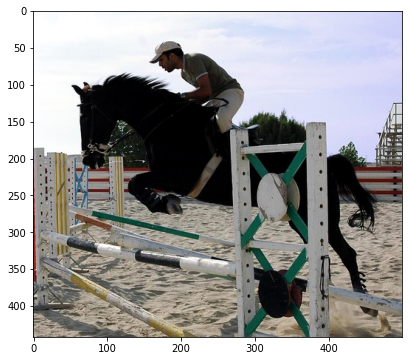

In [10]:
dado, rotulo = VOC[0]

print(type(dado), type(rotulo))
print(dado.size())

dado = dado.permute(1,2,0)
plt.figure(figsize=(8, 6))
plt.imshow(dado)

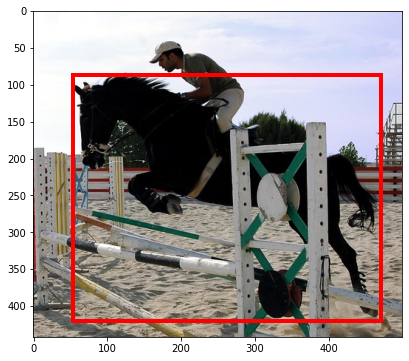

In [23]:
bbox = rotulo['annotation']['object'][0]['bndbox']

xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(dado)

w, h = xmax-xmin, ymax-ymin
rect = patches.Rectangle((xmin, ymin), w, h, fill=False, color='r', linewidth='4')
ax.add_patch(rect)
plt.show()

In [28]:
VOCs = datasets.VOCSegmentation('.',
                                year='2012',
                                image_set='val',
                                download=True,
                                transform=transforms.ToTensor(),
                                target_transform=transforms.ToTensor())

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to .


In [36]:
dado, rotulo = VOCs[0]

print(type(dado), type(rotulo))
print(dado.size(), rotulo.size())

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([3, 366, 500]) torch.Size([1, 366, 500])


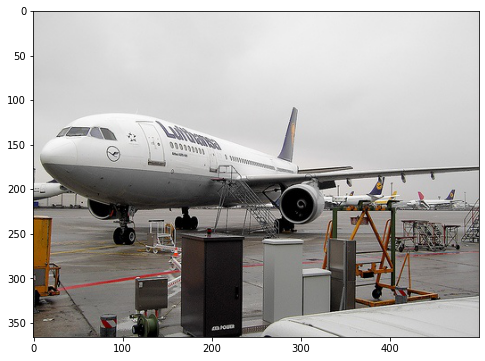

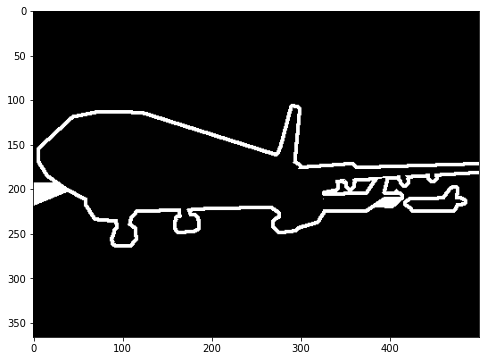

In [37]:
dado = dado.permute(1,2,0)

plt.figure(figsize=(8, 6))
plt.imshow(dado)

plt.figure(figsize=(8, 6))
plt.imshow(rotulo[0], cmap='gray')